# 1. Import libraries

In [34]:
import numpy as np
import pandas as pd
import pickle as pkl

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 26
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'Tahoma'
import seaborn as sns

# 2. load data for visualize

In [35]:
# Dataframe
data = pd.read_csv('Sample 14days_food_preparation_Cleaned.csv')

# Model prediction result (lr, rf, xgb)
model_pred_result_s = pd.read_csv('Food_preparation_model_prediction_result_s.csv')
model_pred_result_m = pd.read_csv('Food_preparation_model_prediction_result_m.csv')

# Model metrics (lr, rf, xgb)
model_metrcis_s = pd.read_csv('Food_preparation_model_metrics_s.csv')
model_metrcis_m = pd.read_csv('Food_preparation_model_metrics_m.csv')

# grid search metrics for hyperparameter tuning result
CV_metrics_s = pd.read_csv('Food_preparation_CV_metrics_s.csv')
CV_metrics_m = pd.read_csv('Food_preparation_CV_metrics_m.csv')

# Best model prediction result
model_best_pred_result_s = pd.read_csv('Food_preparation_best_model_prediction_result_s.csv')
model_best_pred_result_m = pd.read_csv('Food_preparation_best_model_prediction_result_m.csv')

# Best model metrics
model_best_metrcis_s = pd.read_csv('Food_preparation_best_model_metrics_s.csv')
model_best_metrcis_m = pd.read_csv('Food_preparation_best_model_metrics_m.csv')

# 3. Visualize

## 3.1 model actual-prediction plot

In [36]:
def scatter_actual_predict(data, X, y, title='Actual vs Predicted'):
    plt.plot([data[X].min(), data[X].max()], [data[X].min(), data[X].max()], 'k--', lw=4)
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    sns.scatterplot(x=X, y=y, data=data)
    plt.show()

In [37]:
def scatter_actual_predict_subplots(data, X, ys, titles=None):
    plt.figure(figsize=(16*len(ys), 15))
    for i in range(len(ys)):
        y = ys[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        plt.subplot(1, len(ys), i+1)
        plt.plot([data[X].min(), data[X].max()], [data[X].min(), data[X].max()], 'k--', lw=4)
        plt.title(title)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        sns.scatterplot(x=X, y=y, data=data)
    plt.show()

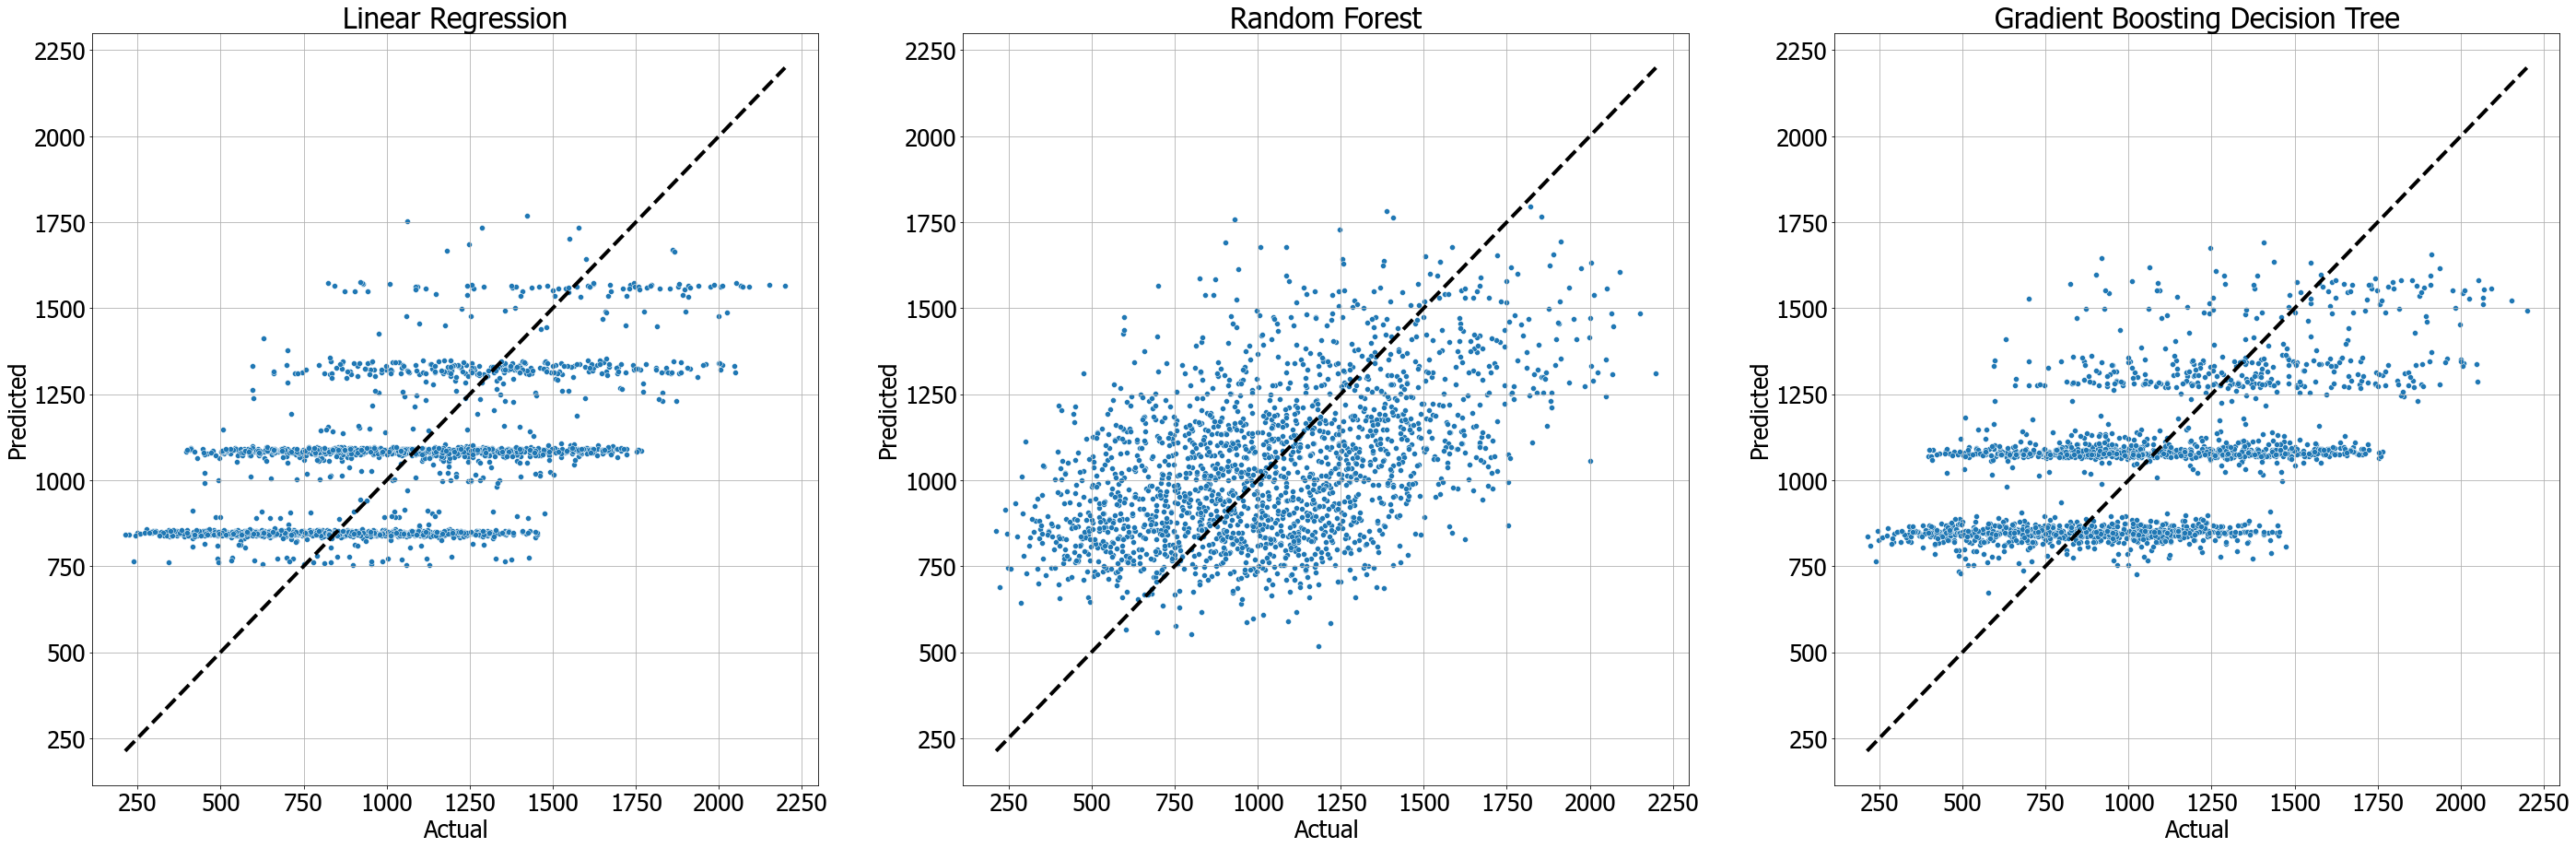

In [38]:
scatter_actual_predict_subplots(
    data=model_pred_result_s,
    X='ys_test',
    ys=['lr_predictions_s', 'rf_predictions_s', 'gbdt_predictions_s'],
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

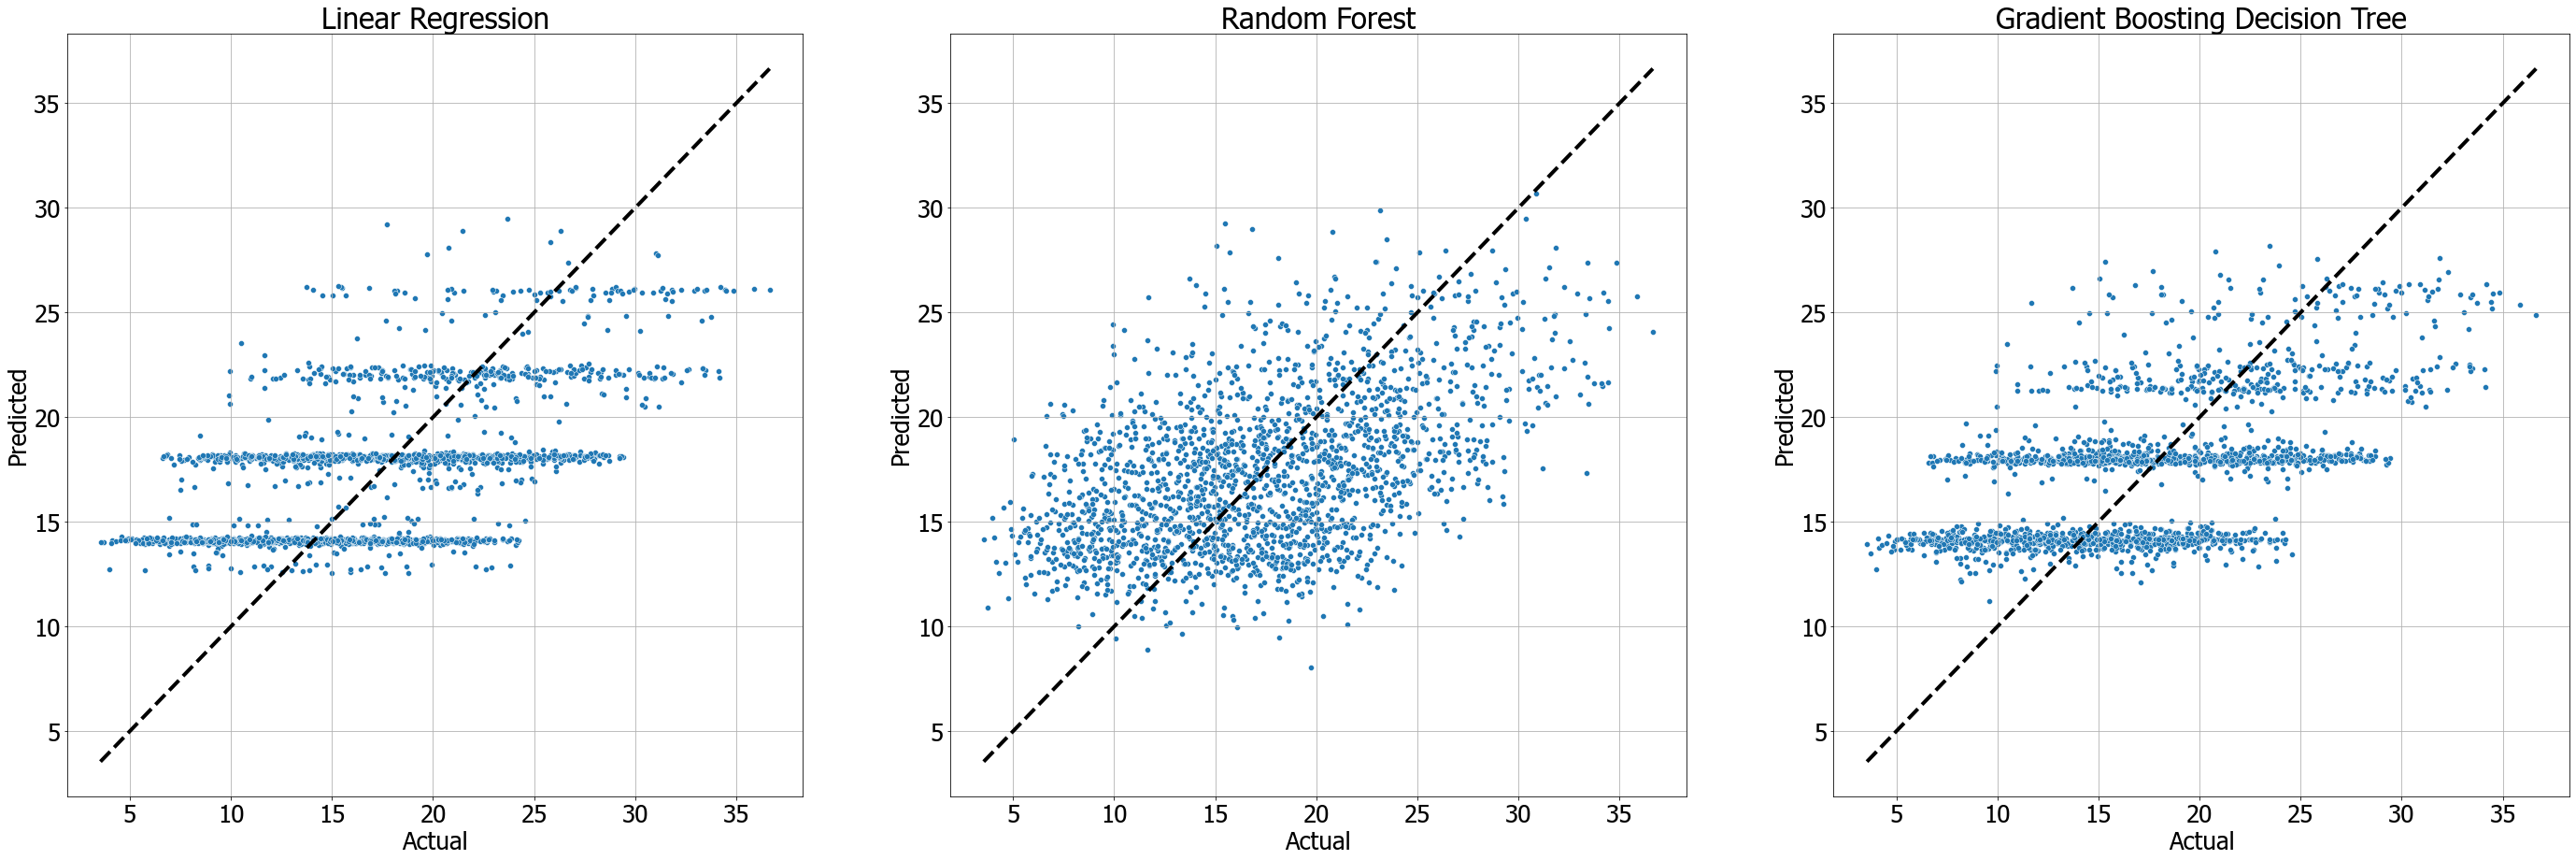

In [39]:
scatter_actual_predict_subplots(
    data=model_pred_result_m,
    X='ym_test',
    ys=['lr_predictions_m', 'rf_predictions_m', 'gbdt_predictions_m'],
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

## 3.2 model actual-proportion plot

In [40]:
def scatter_actual_proportion(data, X, y, title='Actual vs Predicted'):
    data['prop'] = data[y] / data[X] # predicted / actual
    plt.hlines(1, data[X].min(), data[X].max(), colors='black' , linestyles='dashed', lw=4)
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted/Actual')
    sns.scatterplot(x=X, y='prop', data=data)
    plt.show()

In [41]:
def scatter_actual_proportion_subplots(data, X, ys, titles=None):
    plt.figure(figsize=(16*len(ys), 15))
    for i in range(len(ys)):
        y = ys[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        plt.subplot(1, len(ys), i+1)
        data['prop'] = data[y] / data[X] # predicted / actual
        plt.hlines(1, data[X].min(), data[X].max(), colors='black' , linestyles='dashed', lw=4)
        plt.title(title)
        plt.xlabel('Actual')
        plt.ylabel('Predicted/Actual')
        sns.scatterplot(x=X, y='prop', data=data)
        
    plt.show()

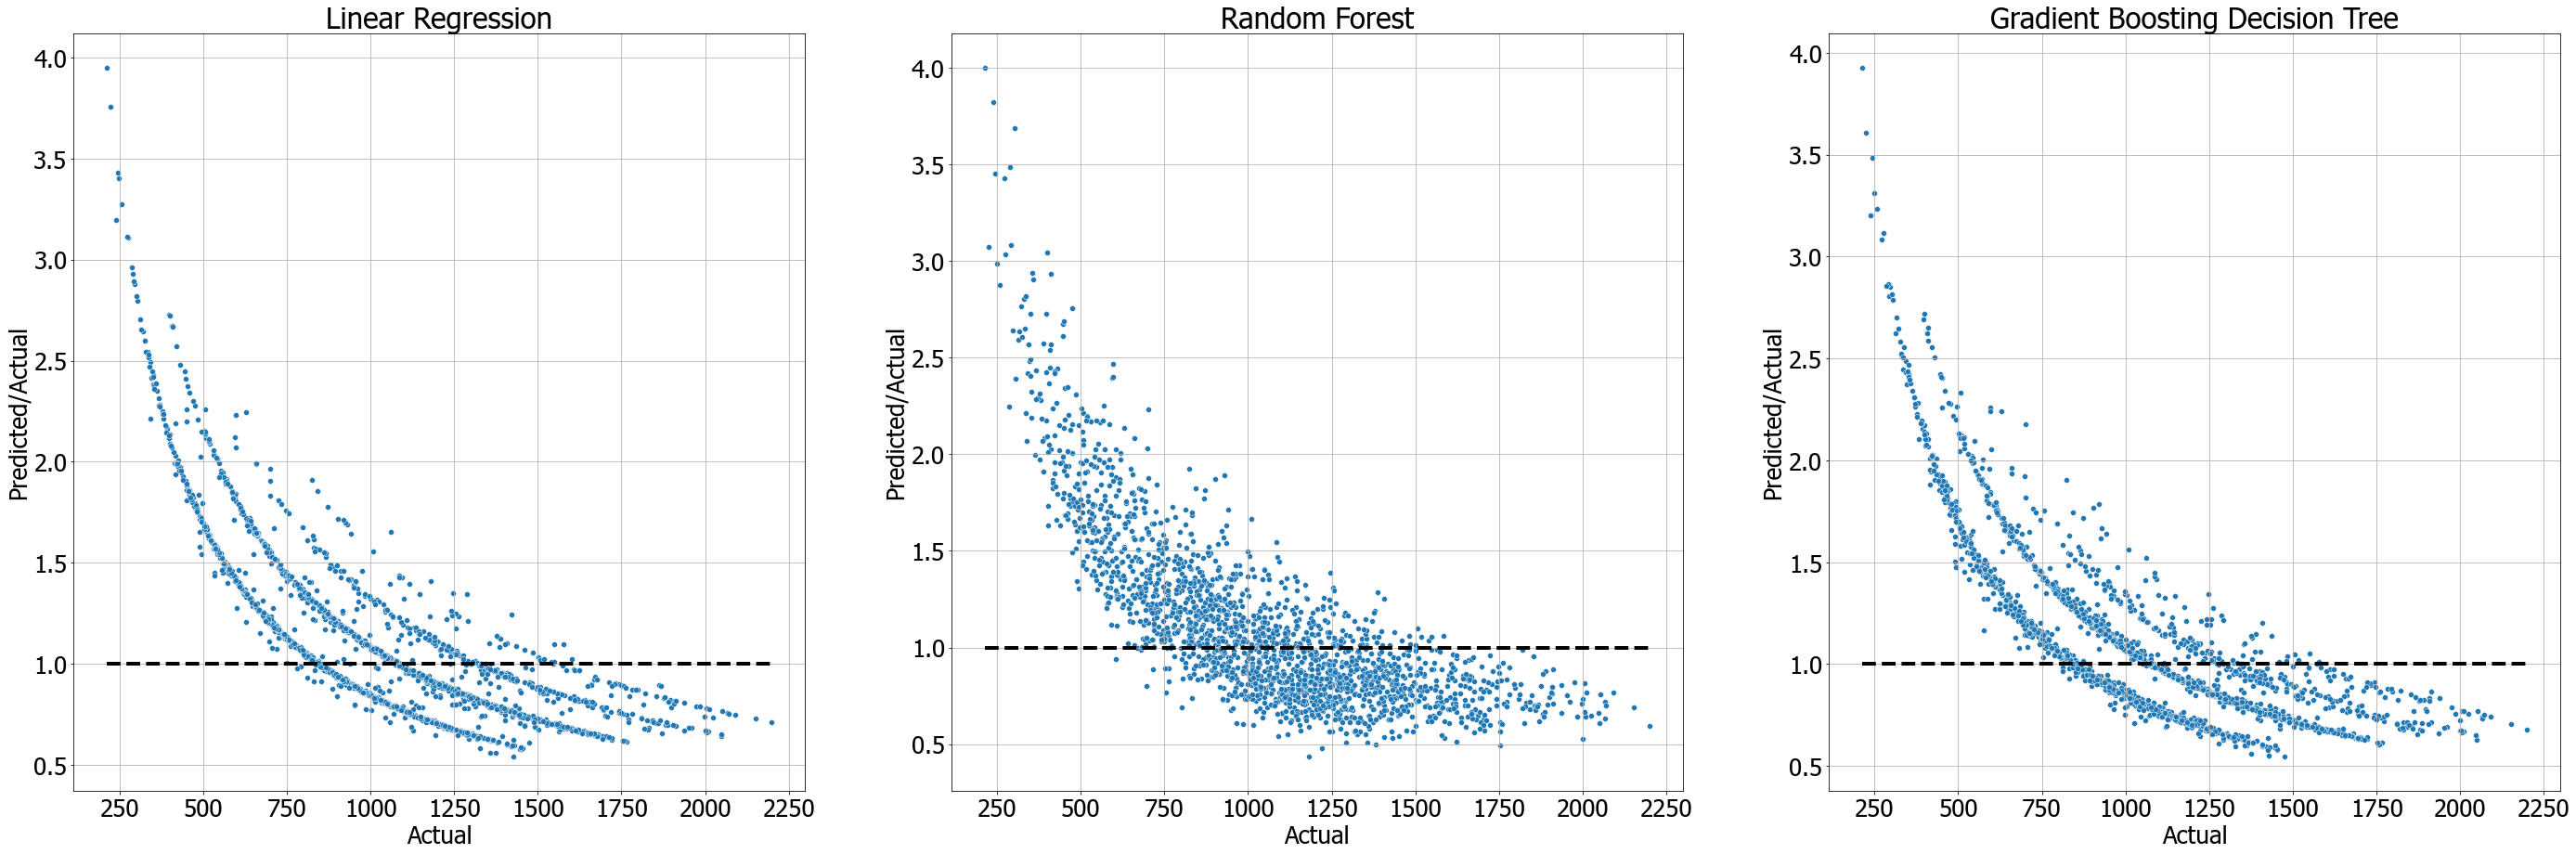

In [42]:
scatter_actual_proportion_subplots(
    data = model_pred_result_s,
    X = 'ys_test', 
    ys = ['lr_predictions_s', 'rf_predictions_s', 'gbdt_predictions_s'],
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

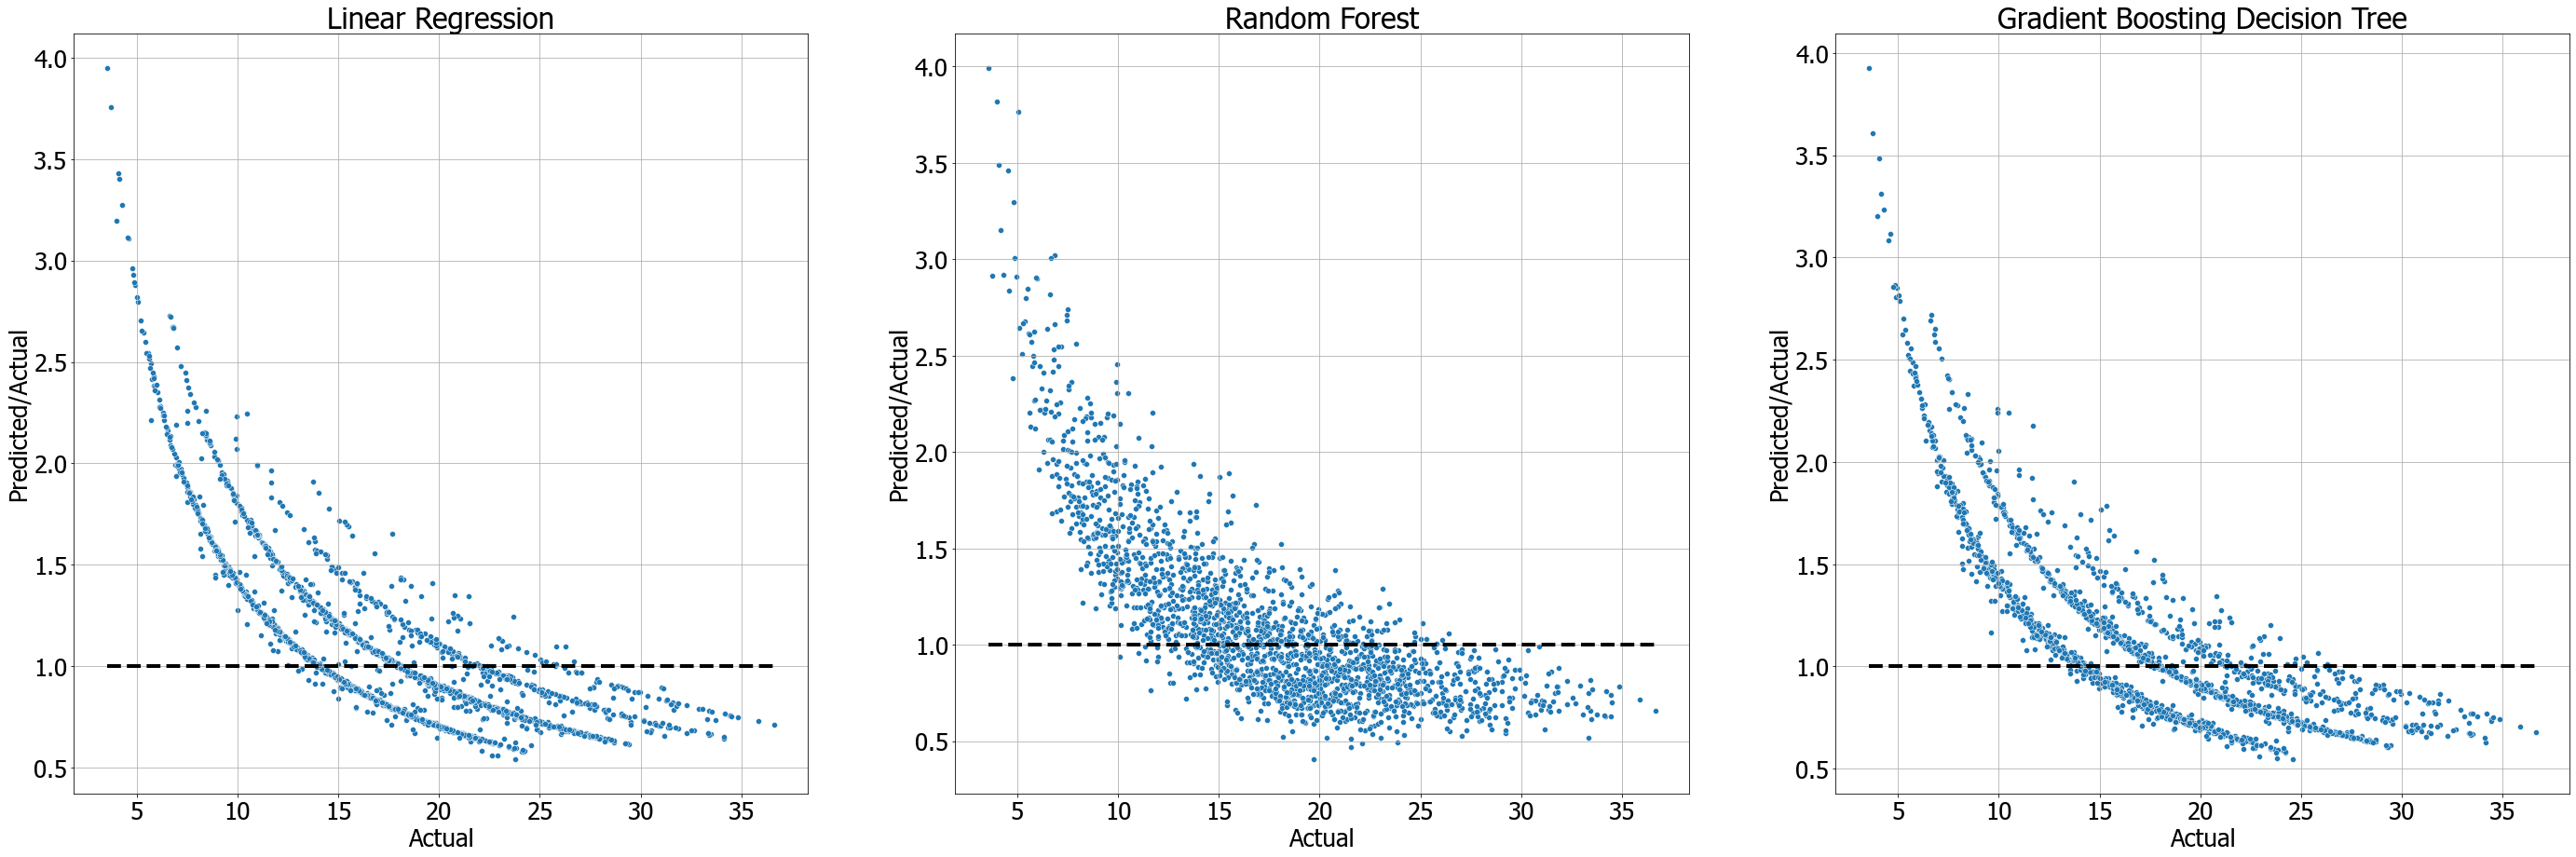

In [43]:
scatter_actual_proportion_subplots(
    data = model_pred_result_m,
    X = 'ym_test',
    ys = ['lr_predictions_m', 'rf_predictions_m', 'gbdt_predictions_m'],
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

## 3.3 model error distribution

In [44]:
def error_distribution(data, X, y, title='Error Distribution', ylim=0.02, mean=True, median=True):
    data['error'] = data[y] - data[X]
    hist, bins = np.histogram(data['error'], bins=100)
    plt.title(title)
    plt.xlabel('Error')
    maxErr = max(data['error'].max(), abs(data['error'].min()))
    maxDensity = ylim
    
    plt.xlim(-maxErr, maxErr)
    plt.ylim(0, maxDensity)
    sns.histplot(data['error'], bins=100, kde=True, stat="density", linewidth=0)
    if mean:
        plt.vlines(data['error'].mean(), 0, maxDensity, colors='green' , linestyles='solid', lw=1, label='Mean')
    if median:
        plt.vlines(data['error'].median(), 0, maxDensity, colors='red' , linestyles='solid', lw=1, label='Med')
    plt.legend()
    plt.show()

In [45]:
def error_distribution_subplots(data, X, ys, titles=None, ylim=0.02, mean=True, median=True, legend=False):
    plt.figure(figsize=(16*len(ys), 15))
    maxDensity = ylim
    maxErr = 0
    for i in range(len(ys)):
        y = ys[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        data['error'] = data[y] - data[X]
        maxErr = max( maxErr, max(data['error'].max(), abs(data['error'].min())) )
    
    for i in range(len(ys)):
        y = ys[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        plt.subplot(1, len(ys), i+1)
        data['error'] = data[y] - data[X]
        plt.title(title)
        plt.xlabel('Error')
        
        plt.xlim(-maxErr, maxErr)
        plt.ylim(0, maxDensity)
        sns.histplot(data['error'], bins=100, kde=True, stat="density", linewidth=0)
        if mean:
            plt.vlines(data['error'].mean(), 0, maxDensity, colors='green' , linestyles='solid', lw=1, label='Mean')
        if median:
            plt.vlines(data['error'].median(), 0, maxDensity, colors='red' , linestyles='solid', lw=1, label='Med')
        if legend:
            plt.legend()
    plt.show()

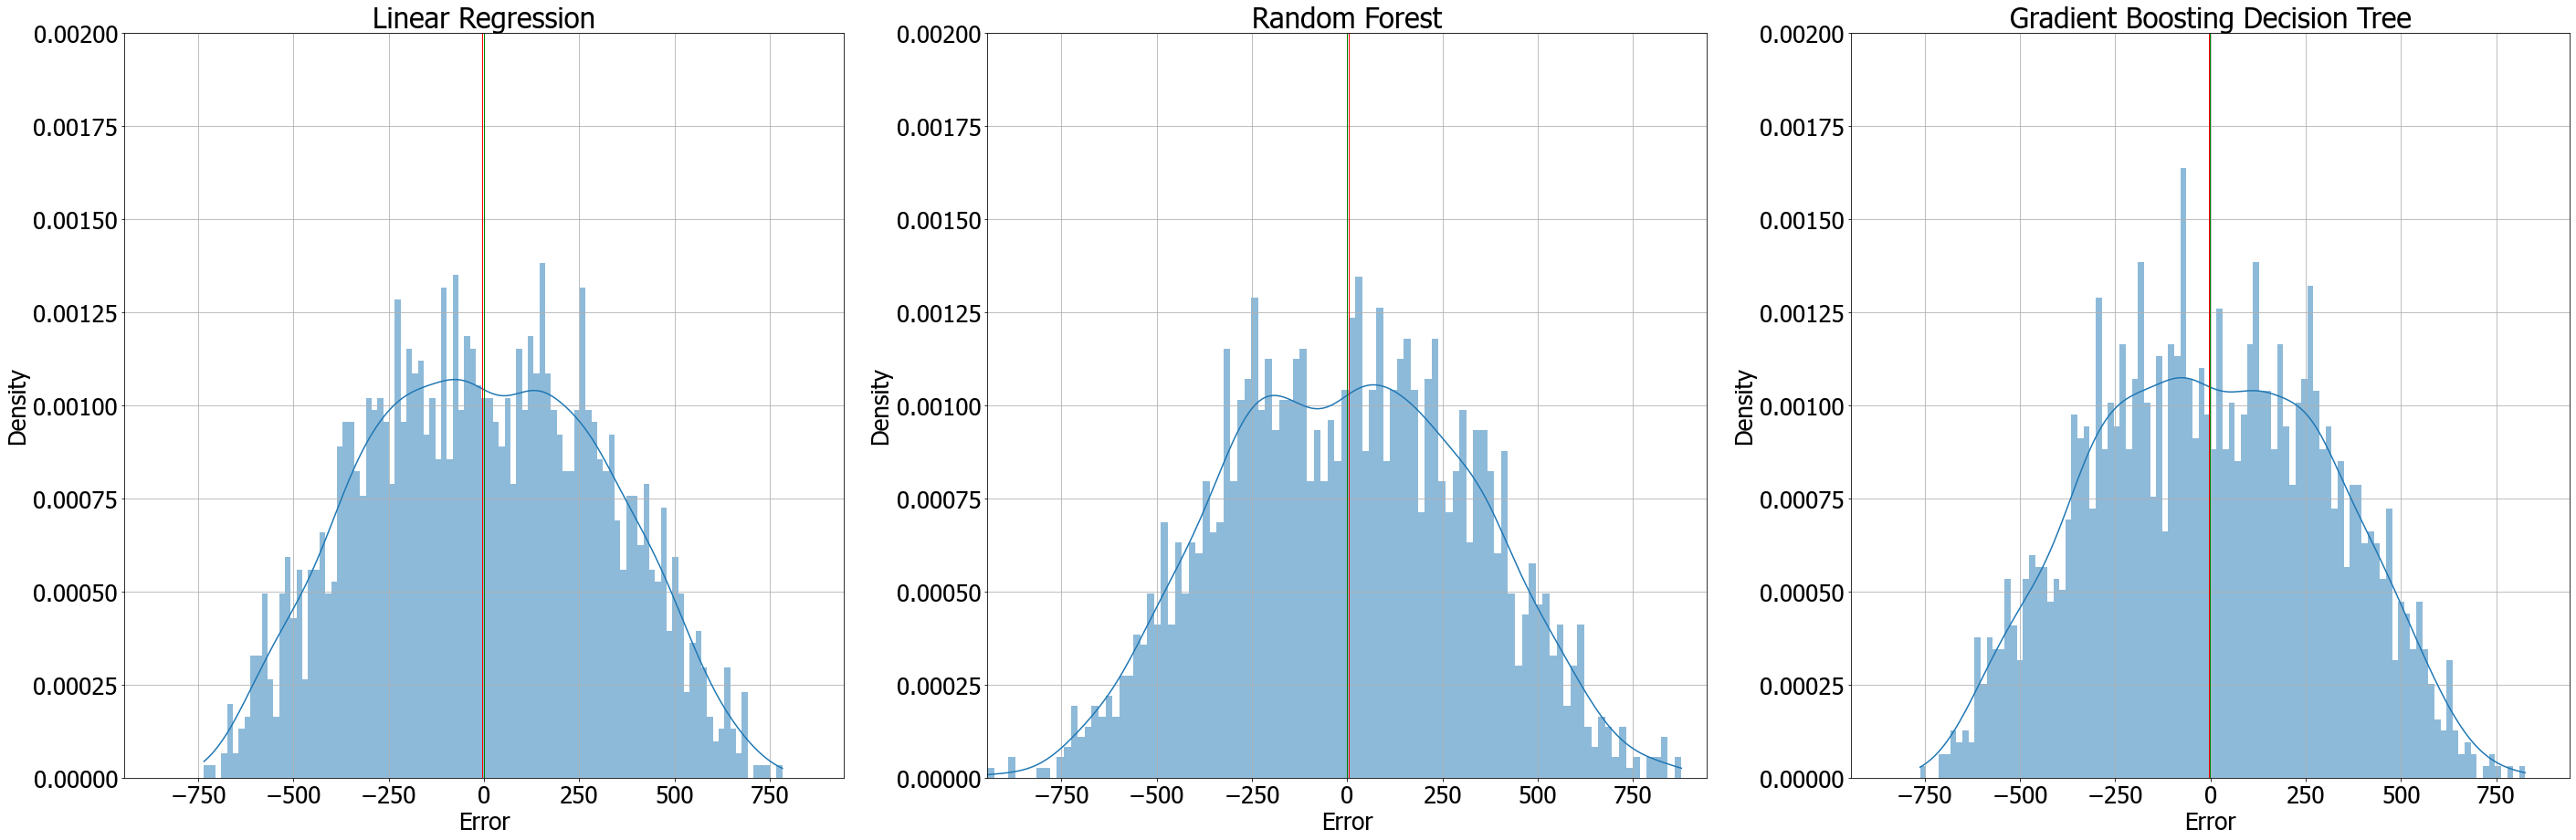

In [46]:
error_distribution_subplots(
    data = model_pred_result_s,
    X = 'ys_test',
    ys = ['lr_predictions_s', 'rf_predictions_s', 'gbdt_predictions_s'],
    ylim=0.002,
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

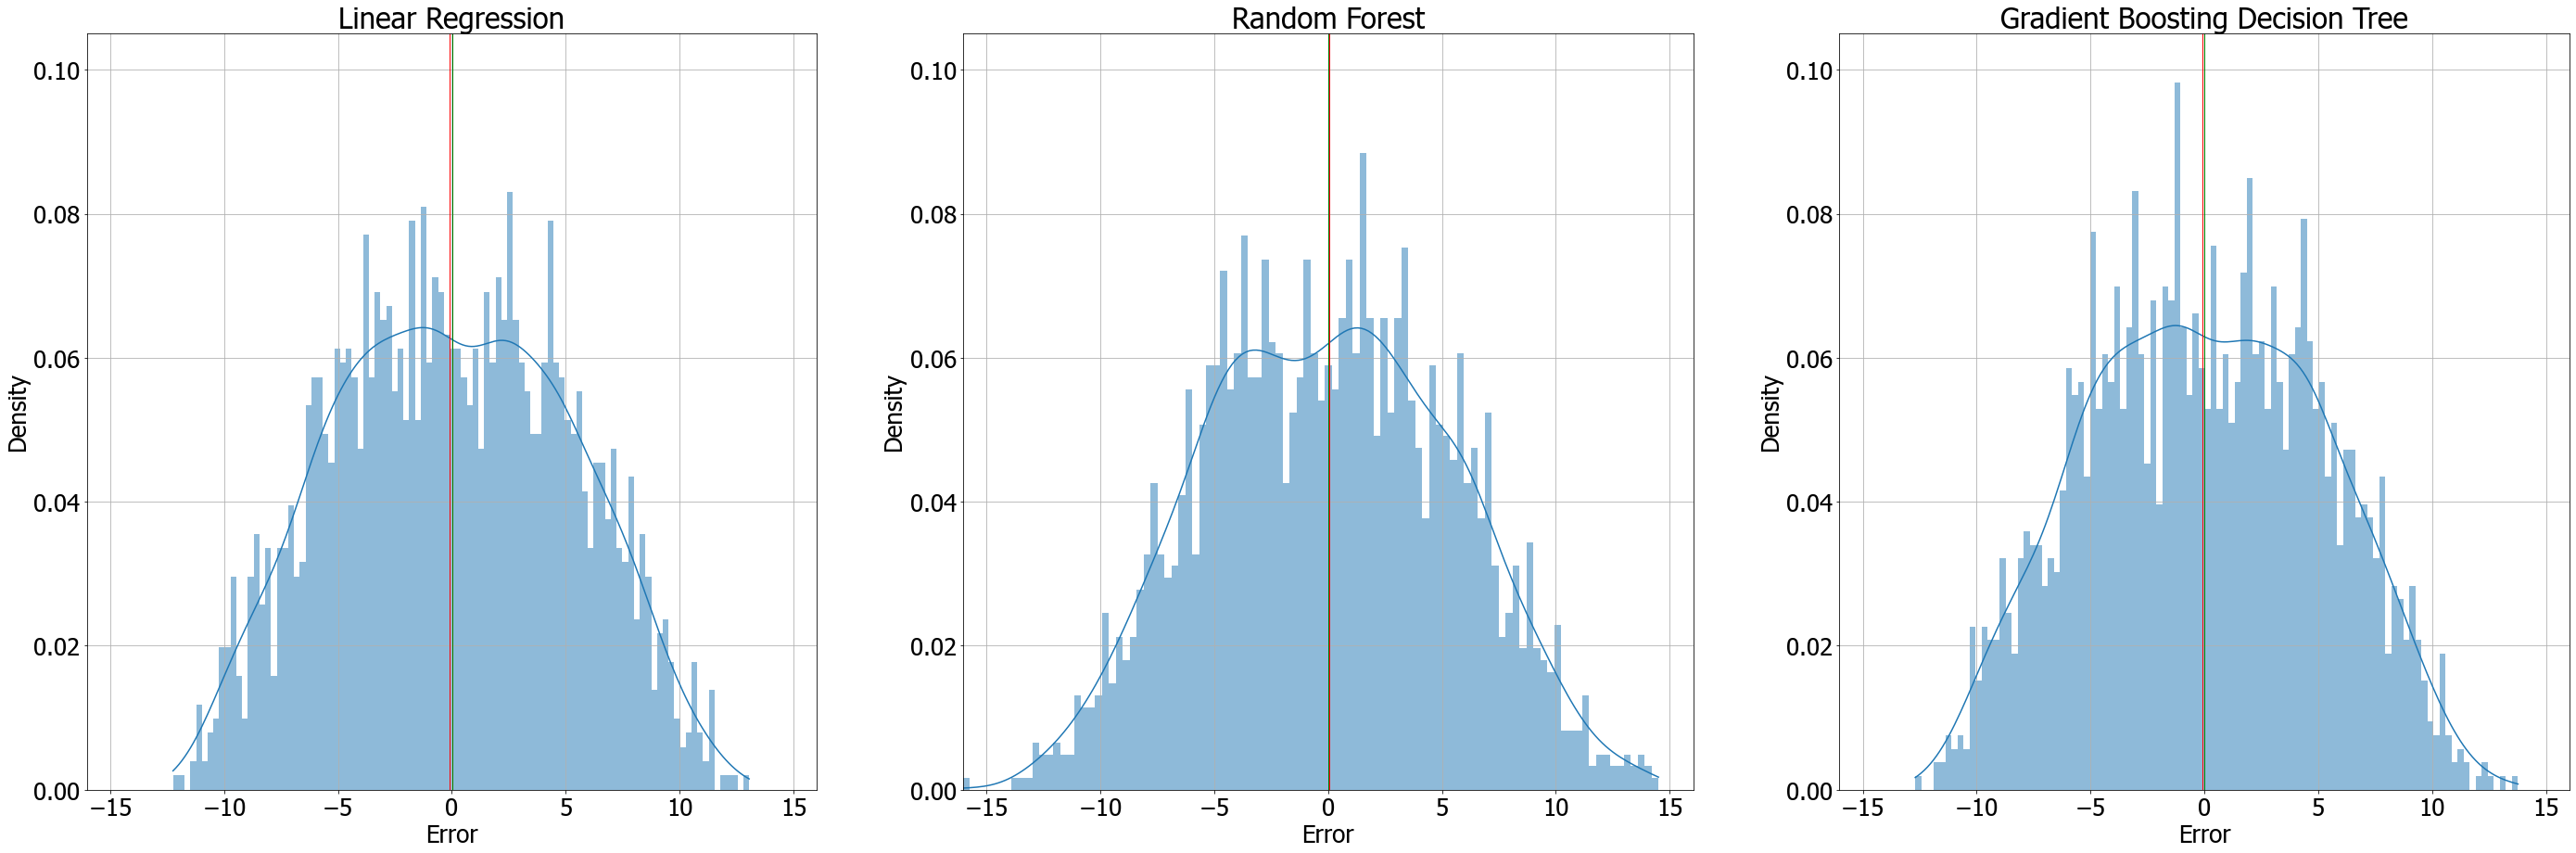

In [47]:
error_distribution_subplots(
    data = model_pred_result_m,
    X = 'ym_test',
    ys = ['lr_predictions_m', 'rf_predictions_m', 'gbdt_predictions_m'],
    ylim=0.105,
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

## 3.4 model metrics (lr, rf, gbt)

In [48]:
model_metrcis_s

,Model,MAE,MSE,R2,RMSE
0,Linear Regression,259.340303,95877.468801,0.300911,309.640871
1,Random Forest,269.830165,106113.072779,0.226279,325.750016
2,Gradient Boosting,258.568869,95514.928175,0.303555,309.054895


In [49]:
model_metrcis_m

,Model,MAE,MSE,R2,RMSE
0,Linear Regression,4.322338,26.632630,0.300911,5.160681
1,Random Forest,4.497211,29.504501,0.225527,5.431805
2,Gradient Boosting,4.309479,26.531936,0.303554,5.150916


## 3.5 hyperparam tuning heatmap

In [50]:
def heatmap(data, X, y, param_max_feature='1.0', scores='mean_test_neg_mean_absolute_error', title='Heatmap'):
    ext_data = data[data['param_max_features']==param_max_feature].drop(['param_max_features'], axis=1)
    heat = ext_data.pivot_table(index='param_n_estimators', columns='param_max_depth', values=scores)[::-1]
    plt.figure(figsize=(16, 15))
    plt.tight_layout()
    plt.title(title)
    sns.heatmap(heat, annot=True, fmt='.4f', cbar_kws={'label': scores})
    plt.show()

In [51]:
def heatmap_subplots(data, X, y, param_max_features=['1.0', 'log2', 'sqrt'], scores='mean_test_neg_mean_absolute_error', titles=['Heatmap']*3):
    fig, axes = plt.subplots(ncols=len(param_max_features), figsize=(16*len(param_max_features), 15))
    fig.tight_layout()
    for i, param_max_feature in enumerate(param_max_features):
        axes[i].set_title(titles[i])
        ext_data = data[data['param_max_features']==param_max_feature].drop(['param_max_features'], axis=1)
        heat = ext_data.pivot_table(index='param_n_estimators', columns='param_max_depth', values=scores)[::-1]
        min_pos = np.unravel_index(np.argmax(heat.values, axis=None), heat.values.shape)[::-1]
        sns.heatmap(heat, annot=True, fmt='.4f', ax=axes[i], cbar_kws={'label': scores})
        axes[i].axes.add_patch(plt.Rectangle((min_pos[0], min_pos[1], i), 1, 1, fc='none', ec='skyblue', lw=5, clip_on=False))
    plt.show()

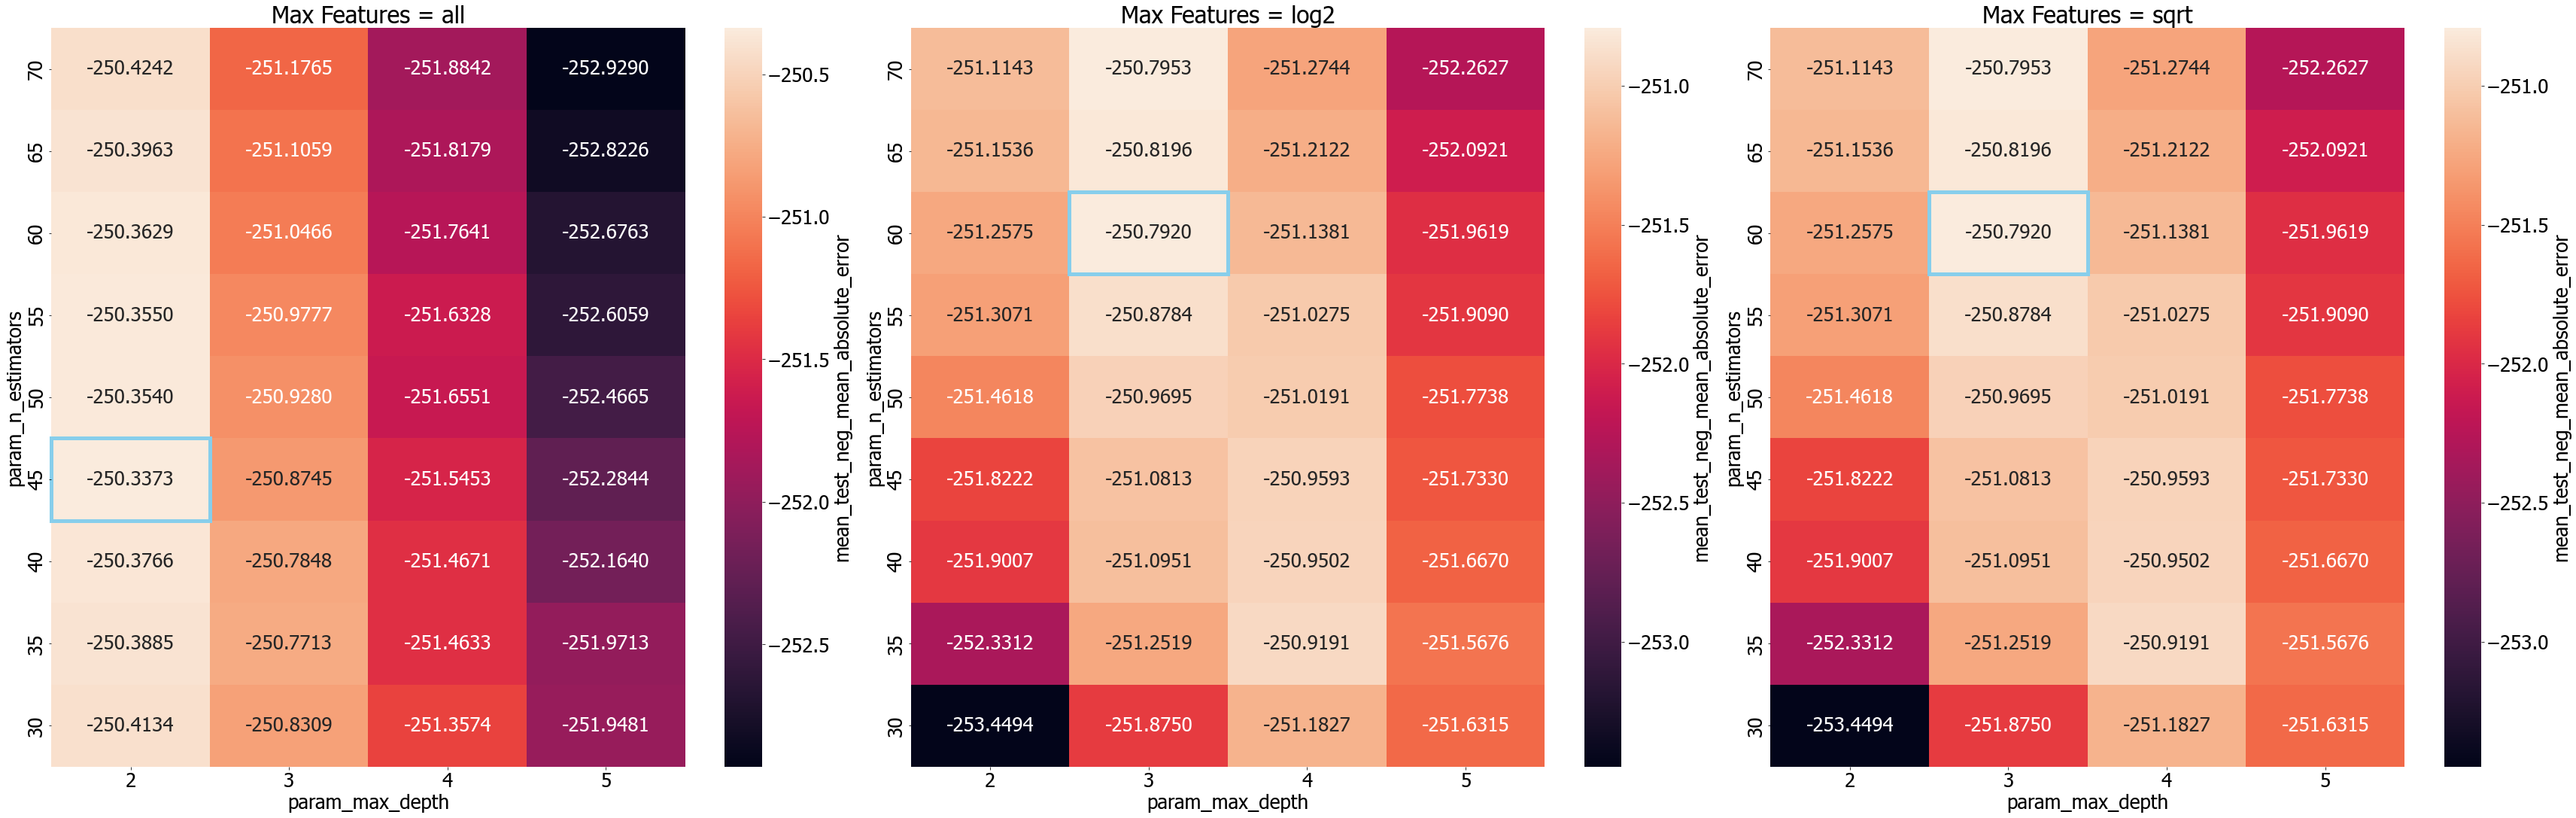

In [52]:
heatmap_subplots(
    data = CV_metrics_s, 
    X = 'param_max_depth',
    y = 'param_n_estimators',
    titles=['Max Features = all', 'Max Features = log2', 'Max Features = sqrt'])

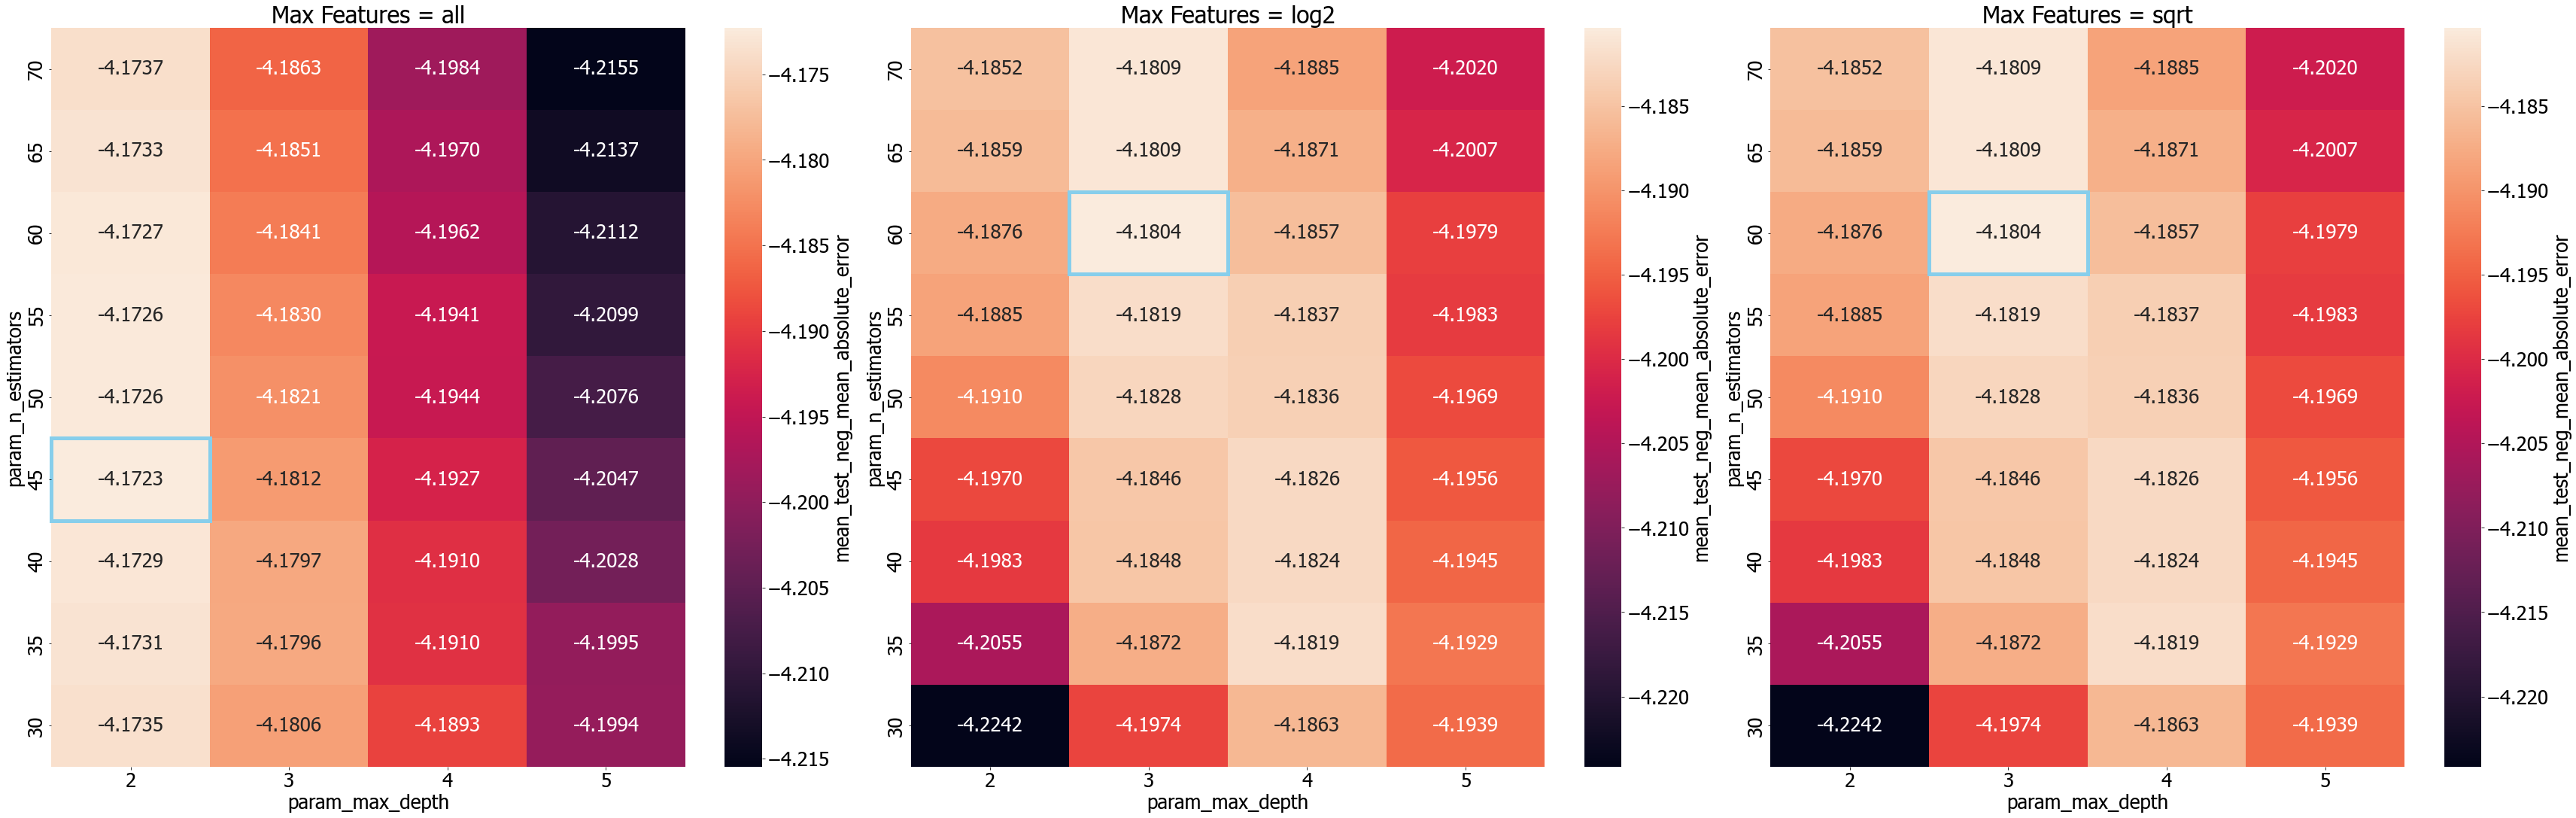

In [53]:
heatmap_subplots(
    data = CV_metrics_m,
    X = 'param_max_depth', 
    y = 'param_n_estimators',
    titles=['Max Features = all', 'Max Features = log2', 'Max Features = sqrt'])

## 3.6 best model result

### 3.6.1 As second

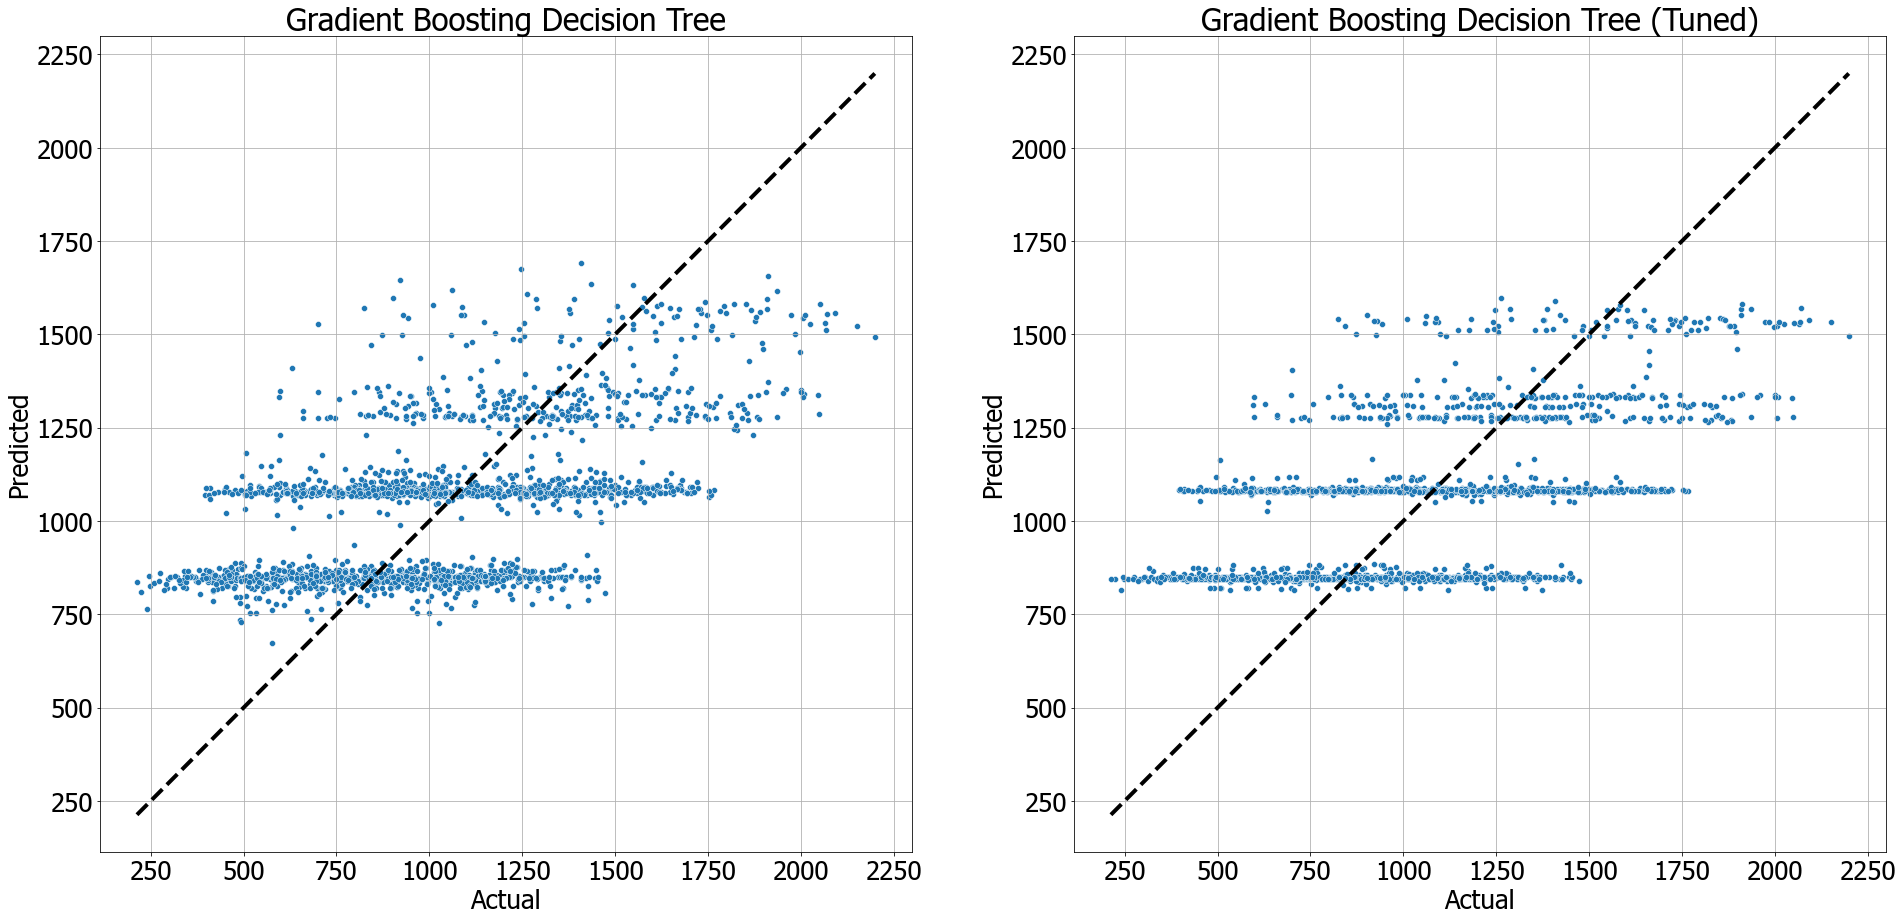

In [54]:
scatter_actual_predict_subplots(
    data=model_best_pred_result_s,
    X='ys_test',
    ys=['gbdt_s', 'gbdt_s (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'])

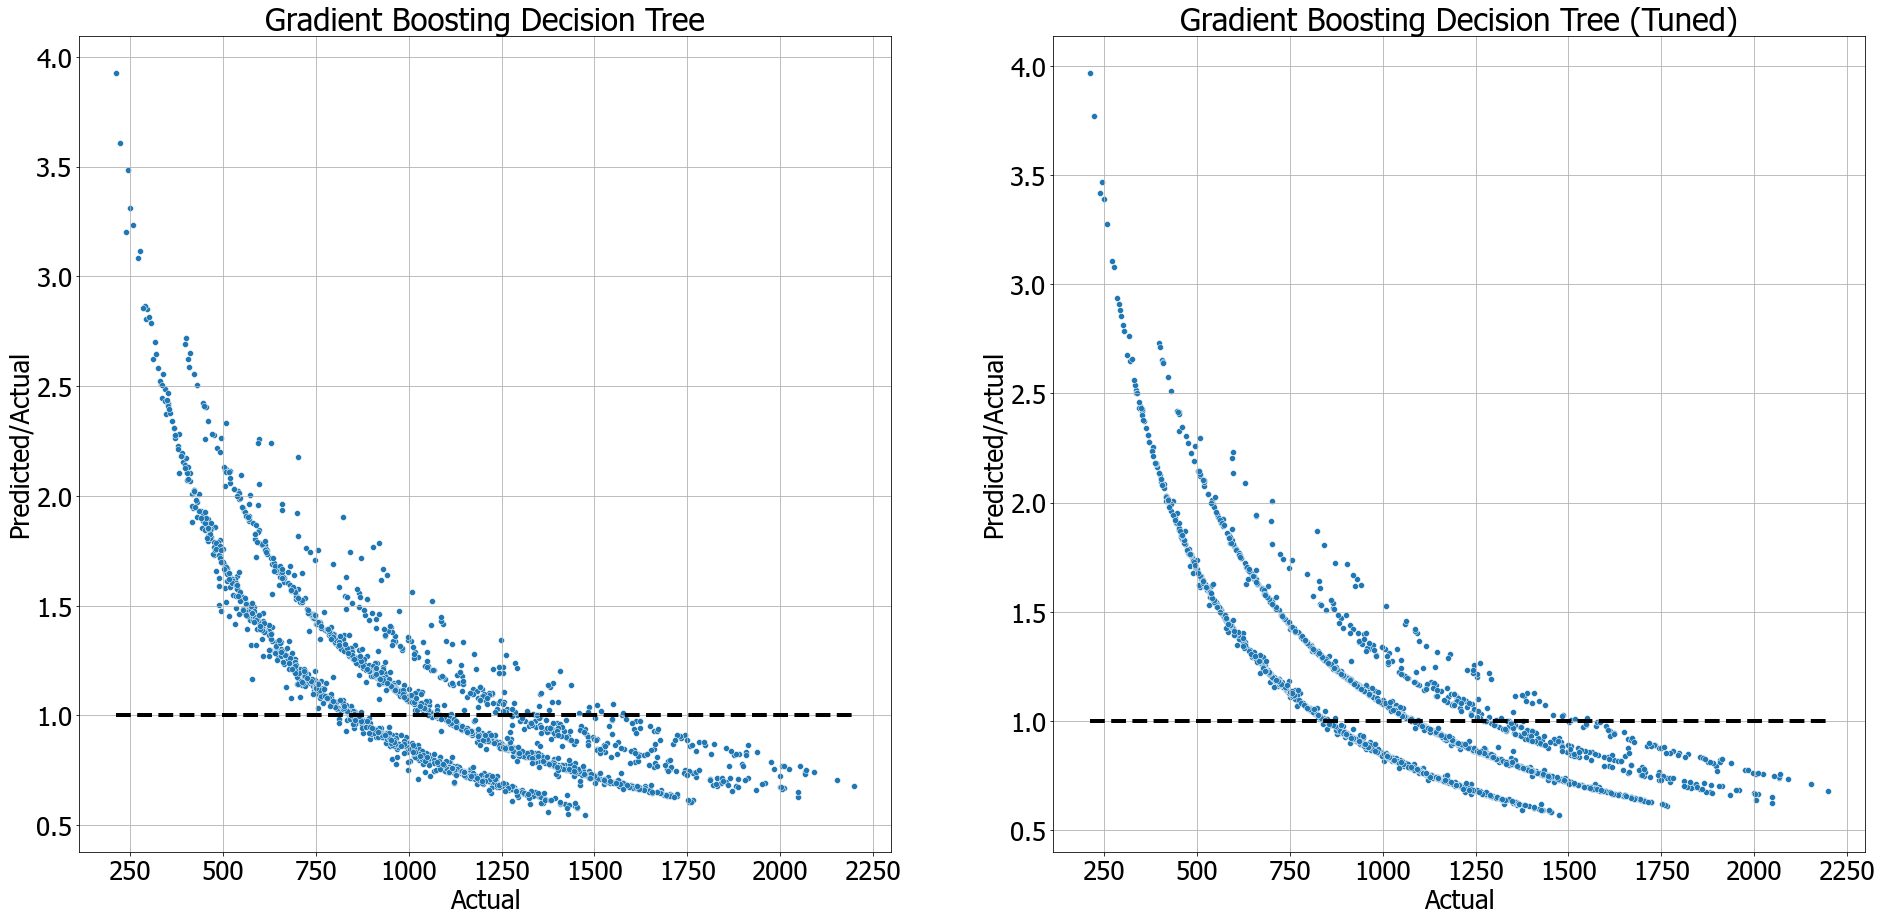

In [55]:
scatter_actual_proportion_subplots(
    data = model_best_pred_result_s,
    X = 'ys_test', 
    ys=['gbdt_s', 'gbdt_s (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'])

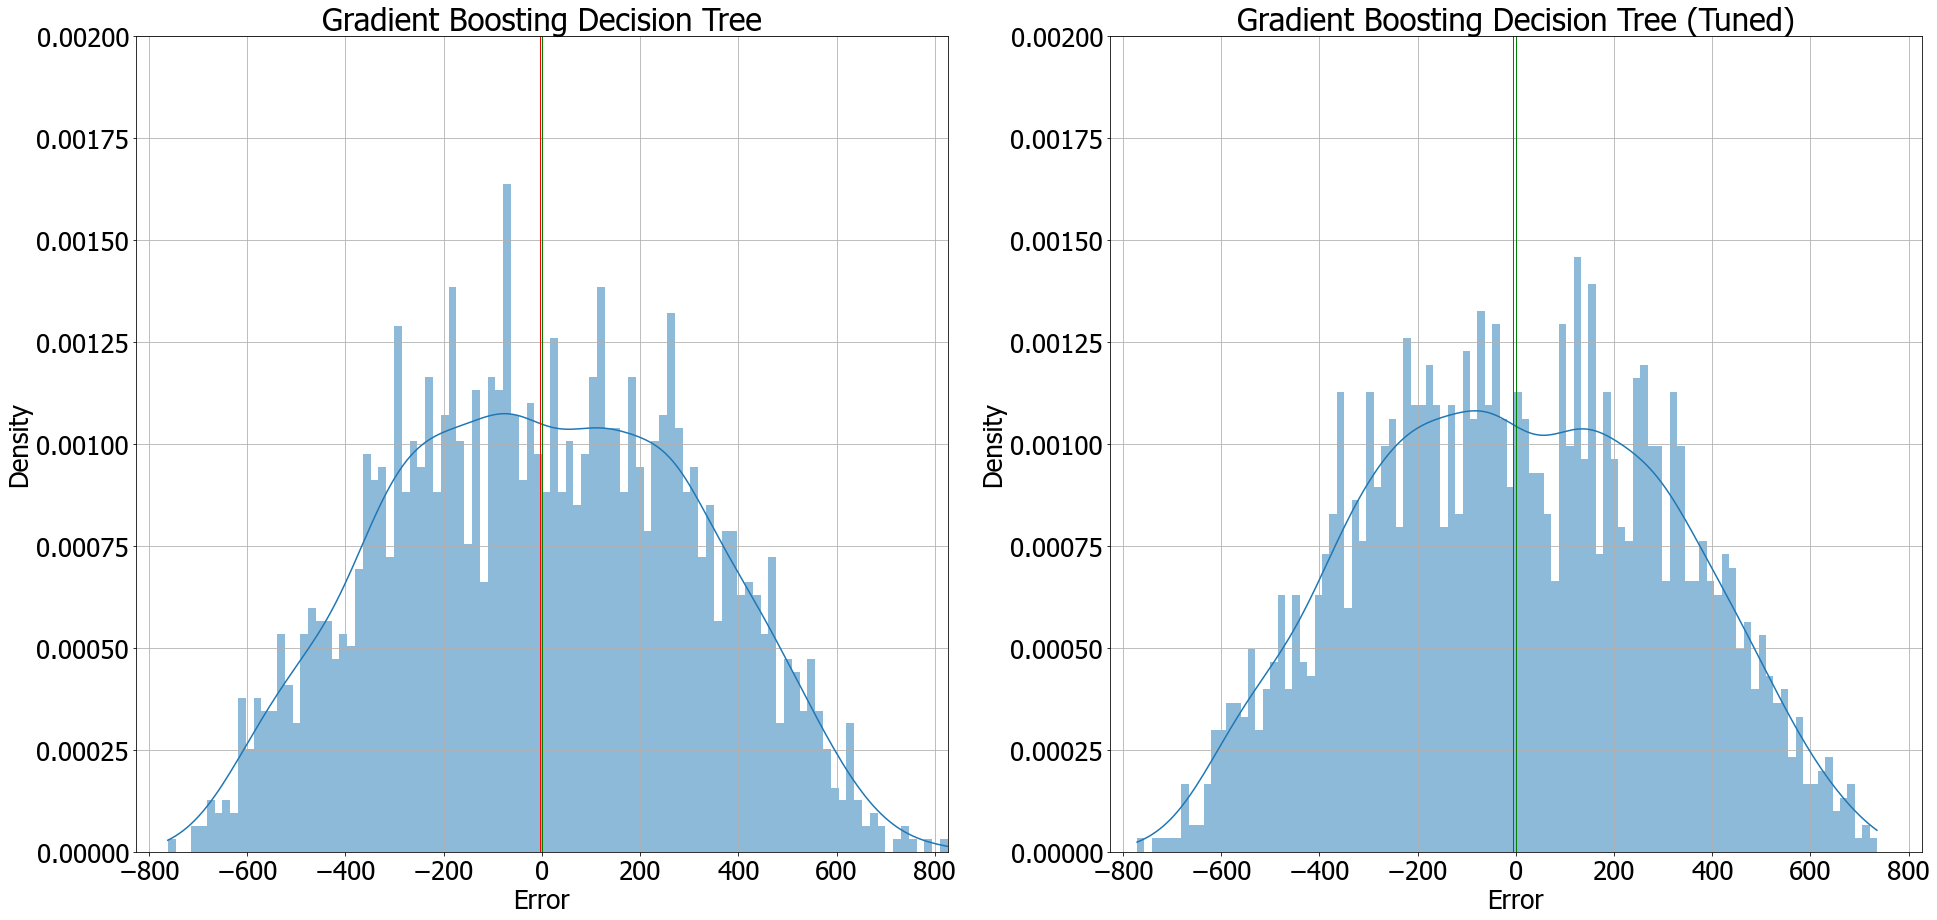

In [56]:
error_distribution_subplots(
    data = model_best_pred_result_s,
    X = 'ys_test', 
    ys=['gbdt_s', 'gbdt_s (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'],
    ylim=0.002)

In [57]:
model_best_metrcis_s

,Model,MAE,MSE,R2,RMSE
0,gbdt_s,258.568869,95514.928175,0.303555,309.054895
1,gbdt_s (tuned),258.505246,95322.875546,0.304955,308.744029


### 3.6.2 As minute

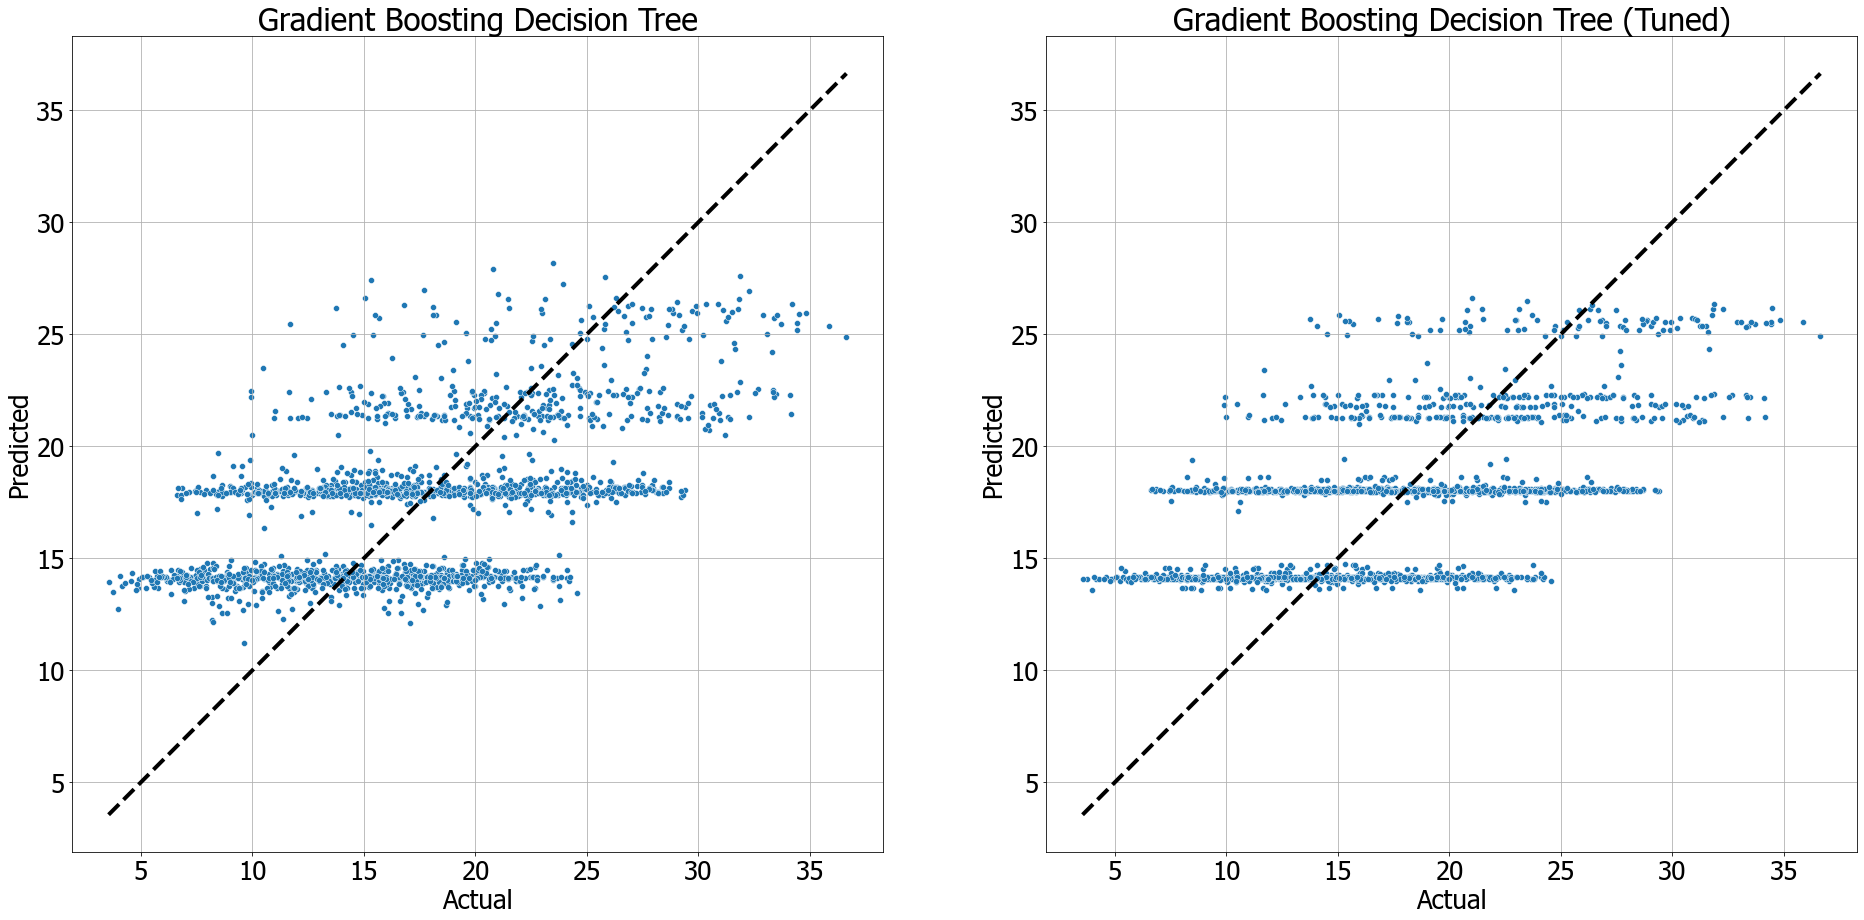

In [58]:
scatter_actual_predict_subplots(
    data = model_best_pred_result_m,
    X = 'ym_test',
    ys=['gbdt_m', 'gbdt_m (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'])

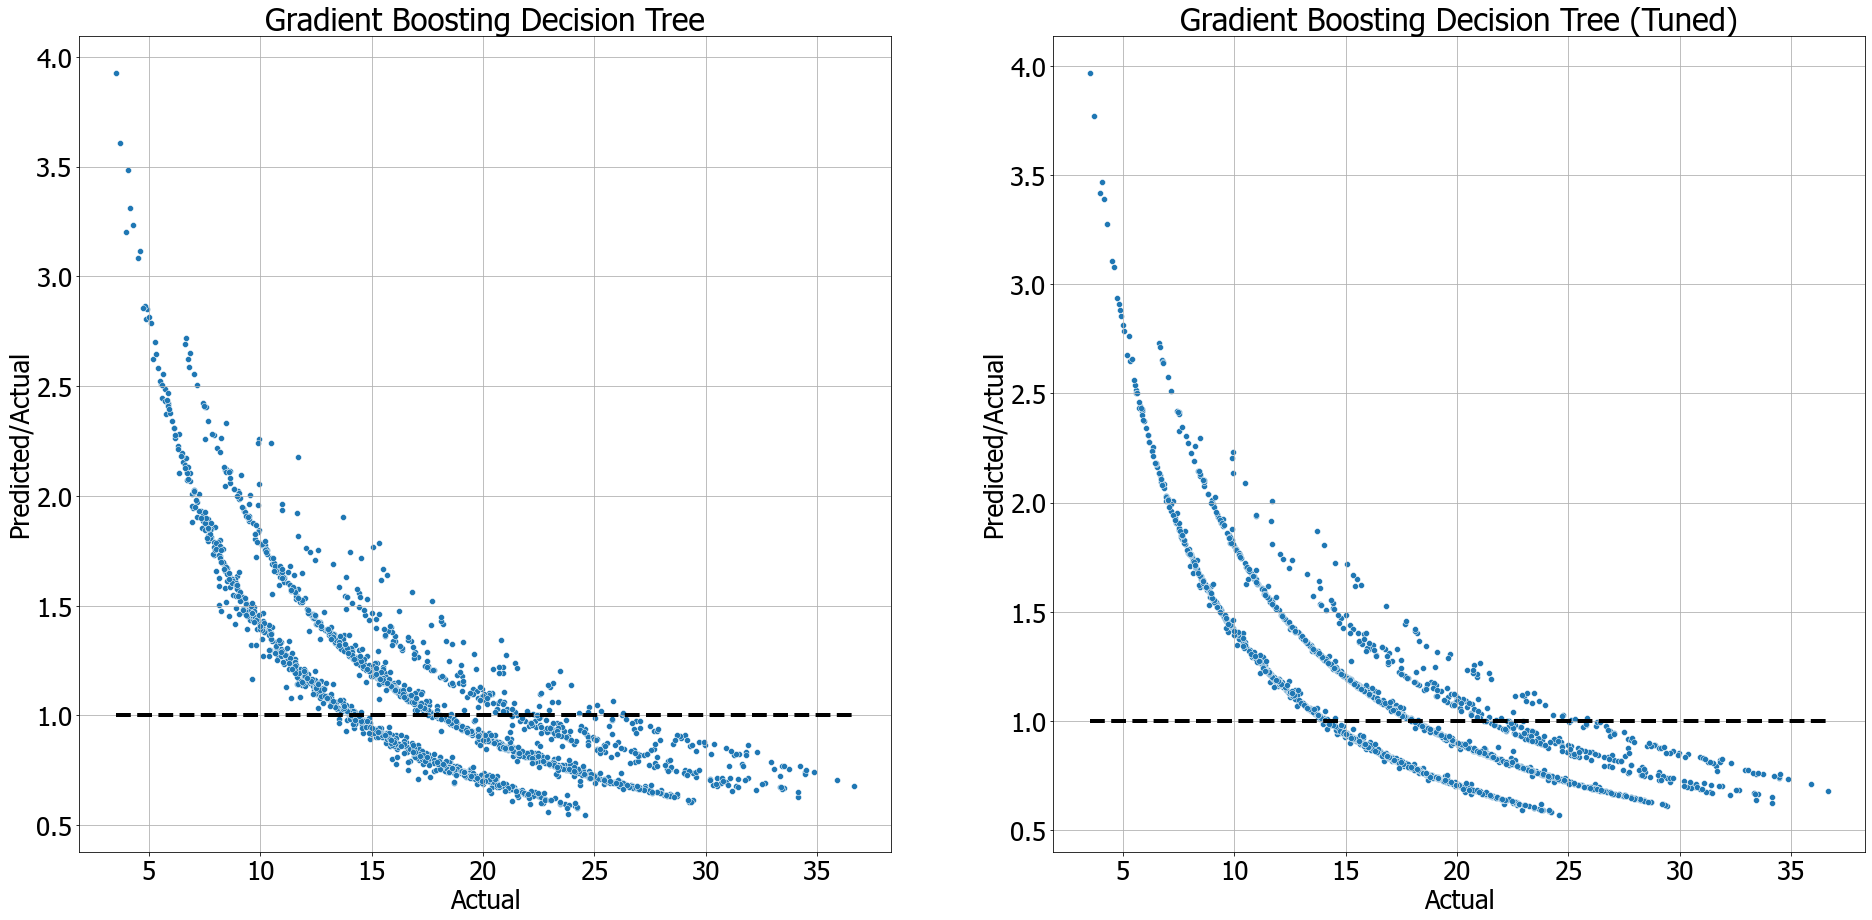

In [59]:
scatter_actual_proportion_subplots(
    data = model_best_pred_result_m,
    X = 'ym_test', 
    ys=['gbdt_m', 'gbdt_m (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'])

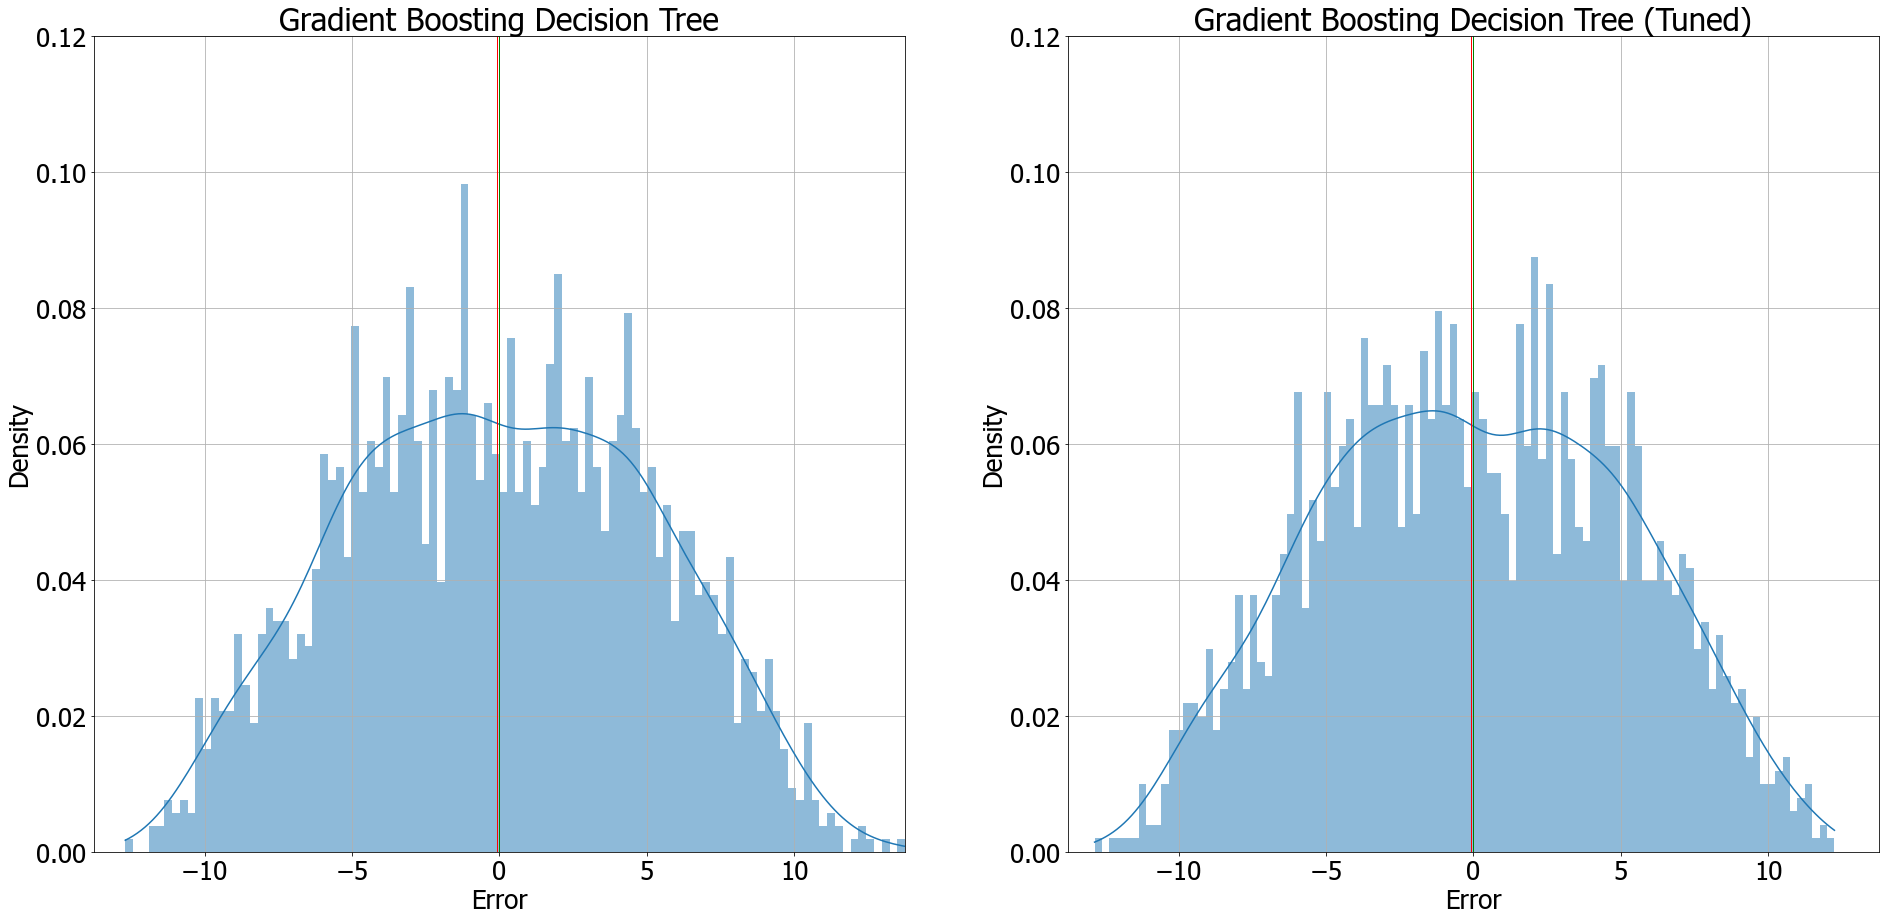

In [60]:
error_distribution_subplots(
    data = model_best_pred_result_m,
    X = 'ym_test', 
    ys=['gbdt_m', 'gbdt_m (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'],
    ylim=0.12)

In [61]:
model_best_metrcis_m

,Model,MAE,MSE,R2,RMSE
0,gbdt_m,4.309479,26.531936,0.303554,5.150916
1,gbdt_m (tuned),4.308421,26.478577,0.304955,5.145734


## 3.7 model preformance (prediction time)

In [62]:
result_time = pd.read_csv('Food_preparation_best_model_prediction_time.csv')

In [63]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

In [82]:
def plot_time_bar(data, title='Food Preparation Model Prediction Time', scale='linear'):
    plot_data = [np.log10(geo_mean(data[data_size])) for data_size in data.columns] if scale=='log' else [data[data_size].mean() for data_size in data.columns]
    plt.figure(figsize=(8, 5))
    plt.tight_layout()
    plt.title(title)
    plt.bar(data.columns, plot_data)
    plt.plot(data.columns, plot_data, color='red', marker='o')
    plt.xlabel('Data Size')
    if scale=='log':
        plt.ylabel('Log10 Time (s)')
    else:
        plt.ylabel('Time (s)')
    plt.show()

In [83]:
plt.rcParams['font.size'] = 10

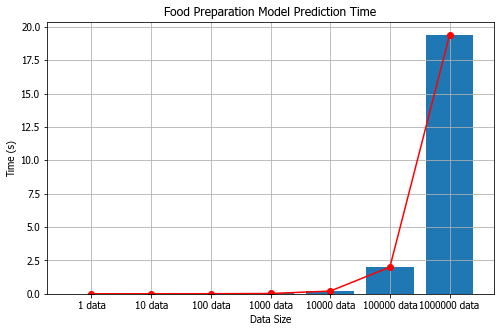

In [84]:
plot_time_bar(result_time, scale='linear')

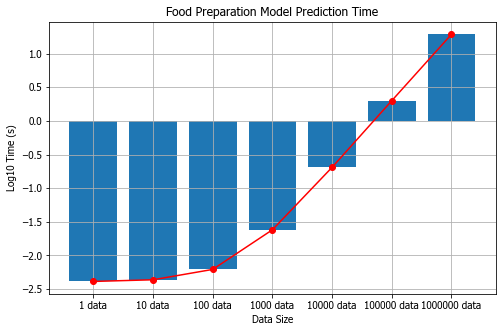

In [85]:
plot_time_bar(result_time, scale='log')